In [7]:
import pandas as pd

data = pd.read_excel(r'/home/mirlayne/Projects/Data Science/DataSource-DataAnalyst.xlsx')
df = pd.DataFrame(data)

# remove spaces in column names
df.columns = df.columns.str.replace(' ', '')

# cleaning data
df.loc[df.DateCancel > pd.Timestamp(2262, 4, 11), 'DateCancel'] = pd.Timestamp(2262, 4, 11)

In [16]:
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)
df.to_sql('table_example', con=engine)

# frequency per Status
status_freq = engine.execute("SELECT Status, COUNT(*) AS freq "
                            "FROM table_example "
                            "GROUP BY Status") \
        .fetchall()

# frequency per ProductType
producttype_freq = engine.execute("SELECT ProductType, COUNT(*) AS freq "
                            "FROM table_example "
                            "GROUP BY ProductType") \
        .fetchall()

# sell frequency per Agent
agent_freq = engine.execute("SELECT AgentID, COUNT(*) AS freq "
                            "FROM table_example "
                            "GROUP BY AgentID") \
        .fetchall()

# frequency per Agent in each Zip Code
zipcode_freq = engine.execute("SELECT ZipCode, AgentID, COUNT(*) AS freq "
                        "FROM table_example "
                        "GROUP BY ZipCode") \
    .fetchall()

print(producttype_freq)

[('M', 3496), ('P', 86)]


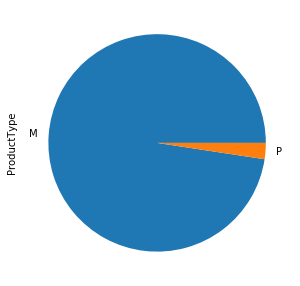

In [41]:
import matplotlib.pyplot as plt

prodtype_counter = df['ProductType'].value_counts()
plot = counter.plot.pie(subplots=True, figsize=(5, 5))


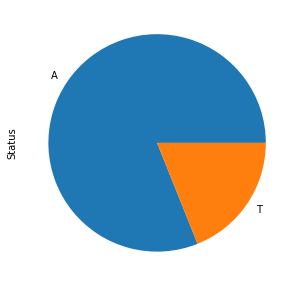

In [21]:
status_counter = df['Status'].value_counts()
plot = status_counter.plot.pie(subplots=True, figsize=(5, 5))

count    166.000000
mean      21.578313
std       15.847088
min        1.000000
25%        8.000000
50%       20.000000
75%       30.000000
max       76.000000
Name: AgentID, dtype: float64


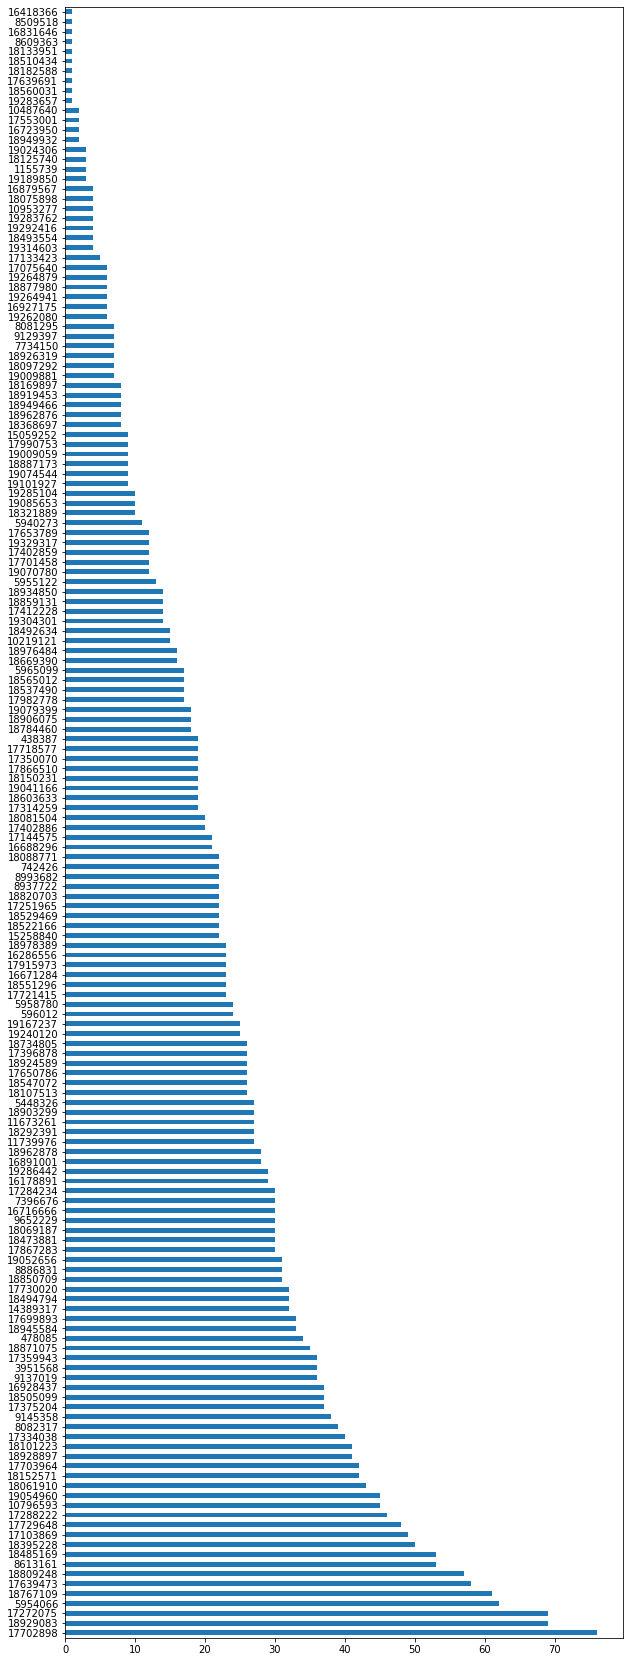

In [89]:
agent_counter = df['AgentID'].value_counts()
print(agent_counter.describe())
agent_counter.plot(kind='barh', rot=0, figsize=(10,30))

70301    9
70560    8
29720    7
79603    7
25271    6
        ..
34984    1
37377    1
32507    1
12803    1
47978    1
Name: ZipCode, Length: 2560, dtype: int64
1    1877
2     469
3     140
4      44
5      16
6      10
7       2
9       1
8       1
Name: ZipCode, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457e0bb7d0>],
      dtype=object)

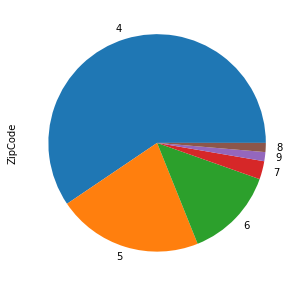

In [31]:
zipcode_counter = df['ZipCode'].value_counts()
print(zipcode_counter)
sells_freq_x_zipcode = zipcode_counter.value_counts()
print(sells_freq_x_zipcode)
sells_freq_x_zipcode[3:].plot.pie(subplots=True, figsize=(5, 5), logy=True)

AgentID   Status
438387    A         18
          T          1
478085    A         24
          T         10
596012    A         17
                    ..
19304301  T          2
19314603  A          3
          T          1
19329317  A          9
          T          3
Name: Status, Length: 309, dtype: int64
AgentID   Status
438387    A         94.736842
          T          5.263158
478085    A         70.588235
          T         29.411765
596012    A         70.833333
                      ...    
19304301  T         14.285714
19314603  A         75.000000
          T         25.000000
19329317  A         75.000000
          T         25.000000
Name: Status, Length: 309, dtype: float64


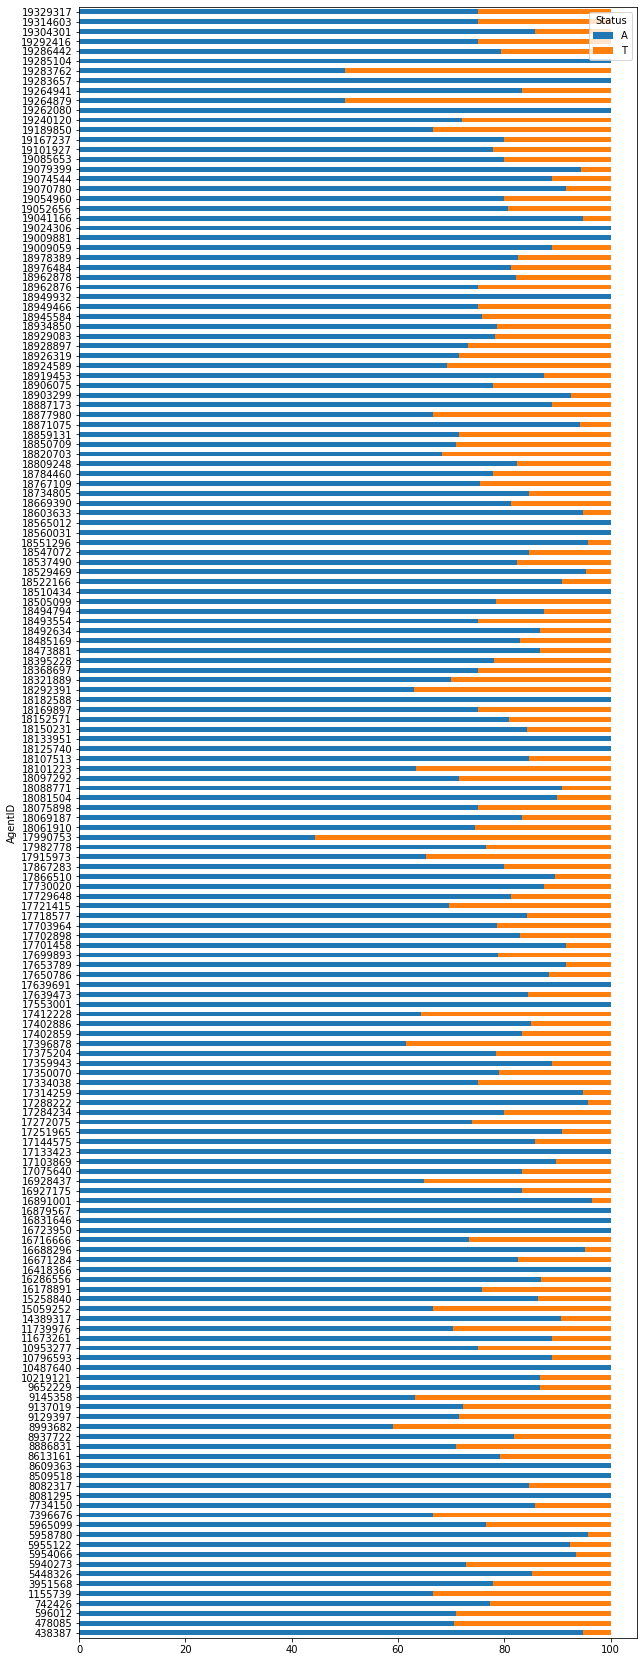

In [88]:
# frequency of agents with each Status in products
status_agent = df['Status'].groupby(df['AgentID'])
status_agent_counter = status_agent.value_counts()
print(status_agent_counter)
status_agent_counter_percent = status_agent_counter.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) # percent
print(status_agent_counter_percent)
df_sacp = status_agent_counter_percent.unstack()
df_sacp.plot.barh(stacked=True, rot=0, figsize=(10,30))
# print('{}\n'.format(df_x.sort_values(by='A', ascending=False)[:1]))
# print(df_x.sort_values(by='T', ascending=False)[:1])

In [49]:
# In which ZipCode there are more clients with status T or A?
grouped = df['Status'].groupby(df['ZipCode'])
x_zip = grouped.value_counts()
df_x_zip = x_zip.unstack()
print(df_x_zip.sort_values(by='A', ascending=False)[:1])
print(df_x_zip.sort_values(by='T', ascending=False)[:1])

Status     A    T
ZipCode          
70560    7.0  1.0
Status    A    T
ZipCode         
30032   NaN  3.0


In [54]:
 # DONE: 1.5- which ProductType have more clients with status T or A?
grouped = df['Status'].groupby(df['ProductType'])
x_pt = grouped.value_counts()
df_x_pt = x_pt.unstack()
separator_str = '\n======================'
print('\n{}{}'.format(df_x_pt, separator_str))
print('{}{}'.format(df_x_pt.sort_values(by='A', ascending=False)[:1], separator_str))
print(df_x_pt.sort_values(by='T', ascending=False)[:1])


Status          A    T
ProductType           
M            2824  672
P              80    6
Status          A    T
ProductType           
M            2824  672
Status          A    T
ProductType           
M            2824  672


In [56]:
grouped = df['ZipCode'].groupby(df['AgentID'])
x_agentzip = grouped.value_counts()
df_x_agentzip = x_agentzip.unstack()
print(df_x_agentzip.dropna(axis=1, how='all'))
print(df_x_agentzip.fillna(0))

ZipCode   1020   1085   1089   1095   1101   1104   1108   1201   1420   \
AgentID                                                                   
438387      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
478085      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
596012      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
742426      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1155739     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
19286442    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19292416    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19304301    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19314603    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19329317    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

ZipCode   1460   ...  98

In [61]:
import datetime
# Adding field Age
df_today = pd.to_datetime(pd.Series(datetime.date.today()))
df_today = df_today.reindex(range(3582), method='ffill')
age = df_today - df['DOB']
l = [int(str(i / 365).split()[0]) for i in age]
df['Age'] = l

In [64]:
age_serie = pd.Series(df['Age'].value_counts(),index=l)
print(age_serie.sort_index())

22     1
24     2
24     2
25     2
25     2
      ..
99     3
100    2
100    2
101    1
102    1
Name: Age, Length: 3582, dtype: int64


              0
20-30       187
30-40      1941
40-50      6137
50-60     31525
60-70    118768
70-80    118822
80-90     21803
90-100     1699
100-...       6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4579de2250>],
      dtype=object)

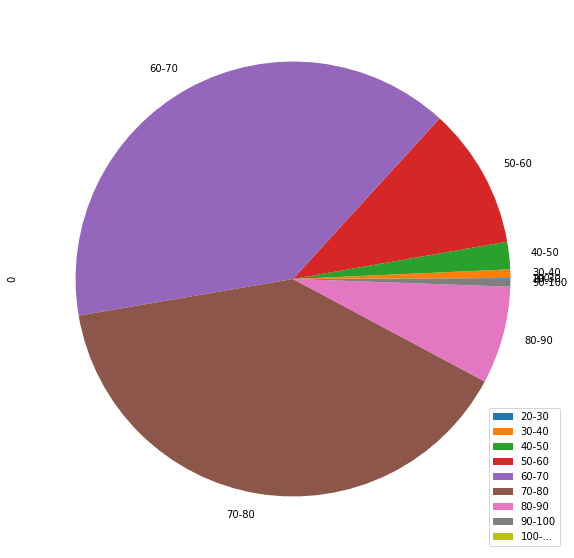

In [86]:
ages_ranges_list = list()
r2_3 = age_serie[age_serie.index < 30]
r2_3_total = r2_3.sum()
# print(r2_3.sort_index())
ages_ranges_list.append(r2_3_total)

r3_4 = age_serie[(age_serie.index >= 30) & (age_serie.index < 40)]
r3_4_total = r3_4.sum()
ages_ranges_list.append(r3_4_total)

r4_5 = age_serie[(age_serie.index >= 40) & (age_serie.index < 50)]
r4_5_total = r4_5.sum()
ages_ranges_list.append(r4_5_total)

r5_6 = age_serie[(age_serie.index >= 50) & (age_serie.index < 60)]
r5_6_total = r5_6.sum()
ages_ranges_list.append(r5_6_total)

r6_7 = age_serie[(age_serie.index >= 60) & (age_serie.index < 70)]
r6_7_total = r6_7.sum()
ages_ranges_list.append(r6_7_total)

r7_8 = age_serie[(age_serie.index >= 70) & (age_serie.index < 80)]
r7_8_total = r7_8.sum()
ages_ranges_list.append(r7_8_total)

r8_9 = age_serie[(age_serie.index >= 80) & (age_serie.index < 90)]
r8_9_total = r8_9.sum()
ages_ranges_list.append(r8_9_total)

r9_10 = age_serie[(age_serie.index >= 90) & (age_serie.index < 100)]
r9_10_total = r9_10.sum()
ages_ranges_list.append(r9_10_total)

r10_11 = age_serie[(age_serie.index >= 100)]
r10_11_total = r10_11.sum()
ages_ranges_list.append(r10_11_total)

ages_range = pd.DataFrame(ages_ranges_list, index=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-...'])
print(ages_range)
ages_range.plot.pie(subplots=True, figsize=(15, 10))

In [91]:
# Adding field Week
df['Week'] = df['DateSold'].apply(lambda x: int(int(x.day) / 7 + 1))
df.head()

,AgentID,Member,ZipCode,DOB,DateSold,Status,DateCancel,Product,ProductType,DateEffective,Age,Week
0,17375204,MID-1,77530,1955-02-08,2019-11-30,A,2262-04-11 00:00:00,H3288,M,2020-02-01,66,5
1,9129397,MID-2,57077,1935-07-11,2019-11-18,A,2262-04-11 00:00:00,H1608,M,2020-01-01,86,3
2,10796593,MID-3,3301,1959-12-02,2019-11-15,A,2262-04-11 00:00:00,H9431,M,2020-01-01,61,3
3,17703964,MID-4,28150,1959-11-29,2019-11-06,A,2262-04-11 00:00:00,H5521,M,2020-01-01,61,1
4,18809248,MID-5,33624,1953-02-09,2019-11-07,A,2262-04-11 00:00:00,H1609,M,2020-01-01,68,2


In [92]:
# 2.1- add field Week sold to determine the sell frequency each week
sell_freq = df['Week'].value_counts()

In [117]:
# 2.3- mix and max number of sells made by any agent in each week
grouped = df['Week'].groupby(df['AgentID'])
w_agent = grouped.value_counts()
df_w_agent = w_agent.unstack()
# print('\n{}'.format(df_w_agent))
print(df_w_agent[1].max())
print(df_w_agent[1].min())
print(separator_str)
print(df_w_agent[2].max())
print(df_w_agent[2].min())
print(separator_str)
print(df_w_agent[3].max())
print(df_w_agent[3].min())
print(separator_str)
print(df_w_agent[4].max())
print(df_w_agent[4].min())
print(separator_str)
print(df_w_agent[5].max())
print(df_w_agent[5].min())
print(separator_str)


14.0
1.0

26.0
1.0

21.0
1.0

28.0
1.0

7.0
1.0



Week              1          2          3          4          5
AgentID                                                        
438387     5.263158  26.315789  15.789474  47.368421   5.263158
478085    17.647059  17.647059  17.647059  38.235294   8.823529
596012     8.333333  25.000000  25.000000  37.500000   4.166667
742426    22.727273  36.363636   4.545455  27.272727   9.090909
1155739         NaN  66.666667  33.333333        NaN        NaN
...             ...        ...        ...        ...        ...
19286442  17.241379  37.931034  13.793103  20.689655  10.344828
19292416        NaN  25.000000  25.000000  50.000000        NaN
19304301  28.571429  21.428571  28.571429  21.428571        NaN
19314603  25.000000  25.000000  50.000000        NaN        NaN
19329317        NaN   8.333333  50.000000  41.666667        NaN

[166 rows x 5 columns]


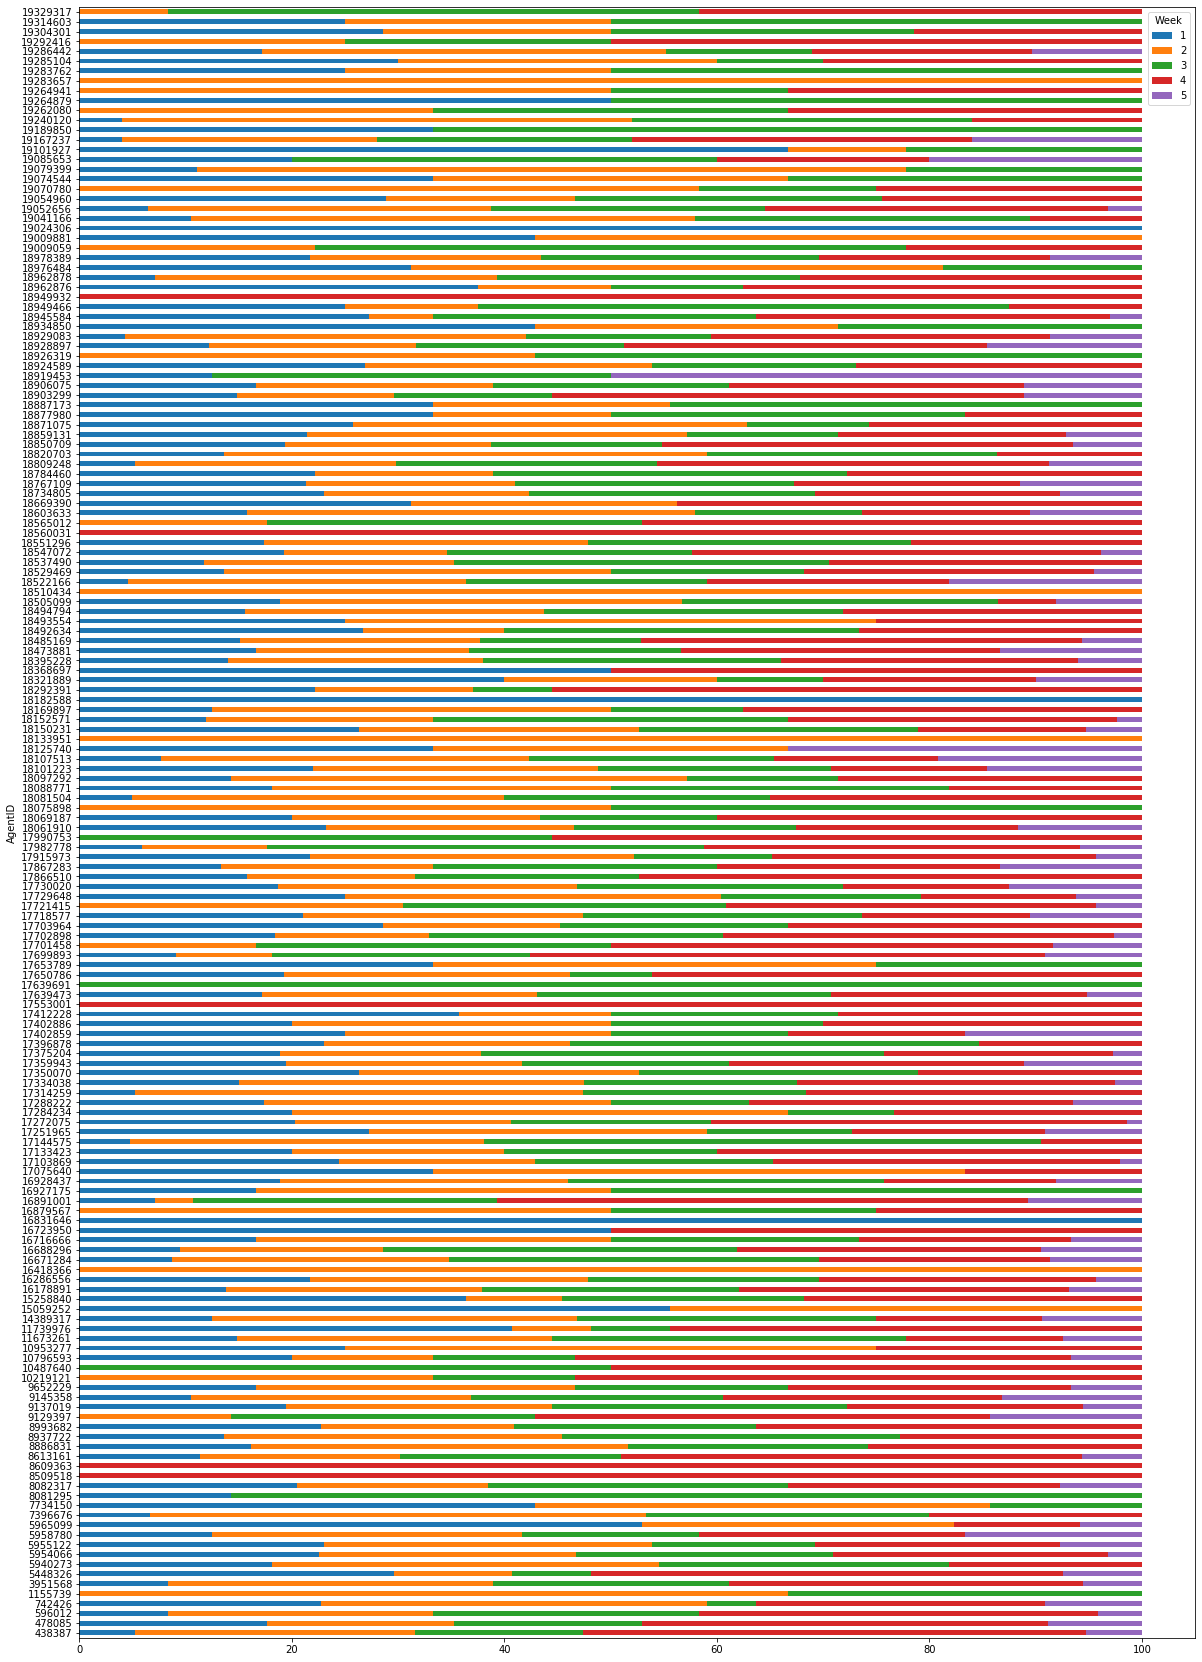

In [116]:
agent_week = df['Week'].groupby(df['AgentID'])
agent_week_counter = agent_week.value_counts()
agent_week_counter = agent_week_counter.fillna(0)
agent_week_counter_percent = agent_week_counter.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) # percent
df_agent_week_counter = agent_week_counter_percent.unstack()

print(df_agent_week_counter)
df_agent_week_counter.plot.barh(stacked=True, rot=0, figsize=(20,30))